In [2]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view
import scipy.special as sp
import matplotlib.pyplot as plt
from math import factorial as fact

In [3]:
def log_fact(n):
    """
    Calculate the logarithm of the factorial of n.
    """
    if n < 2:
        return 0.0
    return np.sum(np.log(np.arange(2, n+1, dtype=float)))

def log_choose(n, k):
    """
    Calculate the logarithm of the binomial coefficient "n choose k".
    """
    return log_fact(n) - log_fact(k) - log_fact(n - k)

In [4]:
class VolumeProfile:
    def __init__(self,p):
        self.volume_list = np.array(p,dtype = np.uint32)

    def __getitem__(self, index):
        return self.volume_list[index]

    def __add__(self,other):
        
        return VolumeProfile(np.concatenate((self.volume_list, other)))

    def __radd__(self,other):
        
        return VolumeProfile(np.concatenate(( other,self.volume_list)))

    def __repr__(self):
        return f'vp{str(self.volume_list)}'

    def __len__(self):
        return len(self.volume_list)


    def num_cdts(self):
        total = 1
        for i,j in sliding_window_view(test,2):
            total*=sp.comb(i+j,i,exact=True)  
        return total

    def log_num_cdts(self):
        scale_factor= .001
        total = 0
        for i,j in sliding_window_view(test,2):
            total+=log_choose(i+j,i)  
        return total-np.log(scale_factor)

In [5]:
def G(n,k):
    if n !=0:
        return fact(n-1+k)//(fact(k-1)*fact(n))
    else:
        return 1
    

def grow_vp(current_vp:VolumeProfile,goal_volume,goal_size):
    # print('===================')
    
    
        
    T_used = len(current_vp)
    V_used = np.sum(current_vp, dtype = np.uint32)*2
    T_remaining = goal_size-T_used
    V_remaining = goal_volume-V_used

    if T_remaining == 0:
        return current_vp

    max_volume = V_remaining-((T_remaining-2-2)*2+2)
    # print(max_volume)


    is_boundary =  T_remaining == 2 
    

    if is_boundary:
        possible_volumes = [V_remaining]
    else:
        possible_volumes = [volume for volume in range(4,max_volume+1,2)]
    
    possible_volumes_multiplicities = []

    for volume in possible_volumes:
        V_remaining_next = V_remaining-volume
        m = number_of_ways_n_itmes_can_be_put_in_k1_slots_and_k2_double_slots(V_remaining_next,2,max(T_remaining-4,0))
        # print(V_remaining_next,2,T_remaining-4,m)
        possible_volumes_multiplicities.append(m)

    
    
    boundary_volume = possible_volumes[np.random.choice(list(range(len(possible_volumes))),p=possible_volumes_multiplicities/np.sum(possible_volumes_multiplicities))]
    # print(f'Possible boundary volumes:{possible_volumes}')
    # print(f'chosen boundary volume:{boundary_volume}')

    if is_boundary:
        possibilities = [[boundary_volume-i,i] for i in range(1,boundary_volume)]
    else:
        
        possibilities = [[boundary_volume//2-i,i] for i in range(1,boundary_volume//2)]
        # print(f'This is not a boundary, and the possibilities are {possibilities}')

    if len(current_vp)==0:
        weights = [sp.comb(i+j,i,exact=True)  for (i,j) in possibilities]
    else:
        weights = [sp.comb(i+current_vp[0],i,exact=True)*sp.comb(j+current_vp[-1],j,exact=True)  for (i,j) in possibilities]
    
        
    new_boundary = possibilities[np.random.choice(list(range(len(possibilities))),p=weights/np.sum(weights))]
    next_vp = new_boundary[0:1]+current_vp+new_boundary[1:2]
    # print(f'The next vp is {next_vp}')
    return(grow_vp(next_vp,goal_volume,goal_size))



In [ ]:
def grow_vp_2(current_vp:VolumeProfile,goal_volume,goal_size):
    # print('===================')
    
    
        
    T_used = len(current_vp)
    V_used = np.sum(current_vp, dtype = np.uint32)*2
    T_remaining = goal_size-T_used
    V_remaining = goal_volume-V_used

    if T_remaining == 0:
        return current_vp

    max_volume = V_remaining-((T_remaining-2-2)*2+2)


    is_boundary =  T_remaining == 2 
    

    if is_boundary:
        possible_volumes = [V_remaining]
    else:
        possible_volumes = [volume for volume in range(4,max_volume+1,2)]
    
    possible_volumes_multiplicities = []

    for volume in possible_volumes:
        V_remaining_next = V_remaining-volume
        m = number_of_ways_n_itmes_can_be_put_in_k1_slots_and_k2_double_slots(V_remaining_next,2,max(T_remaining-4,0))
        # print(V_remaining_next,2,T_remaining-4,m)
        possible_volumes_multiplicities.append(m)

    
    
    boundary_volume = possible_volumes[np.random.choice(list(range(len(possible_volumes))),p=possible_volumes_multiplicities/np.sum(possible_volumes_multiplicities))]
    # print(f'Possible boundary volumes:{possible_volumes}')
    # print(f'chosen boundary volume:{boundary_volume}')

    if is_boundary:
        possibilities = [[boundary_volume-i,i] for i in range(1,boundary_volume)]
    else:
        
        possibilities = [[boundary_volume//2-i,i] for i in range(1,boundary_volume//2)]
        # print(f'This is not a boundary, and the possibilities are {possibilities}')

    if len(current_vp)==0:
        weights = [sp.comb(i+j,i,exact=True)  for (i,j) in possibilities]
    else:
        weights = [sp.comb(i+current_vp[0],i,exact=True)*sp.comb(j+current_vp[-1],j,exact=True)  for (i,j) in possibilities]
    
        
    new_boundary = possibilities[np.random.choice(list(range(len(possibilities))),p=weights/np.sum(weights))]
    next_vp = new_boundary[0:1]+current_vp+new_boundary[1:2]
    # print(f'The next vp is {next_vp}')
    return(grow_vp(next_vp,goal_volume,goal_size))

In [6]:
def number_of_ways_n_itmes_can_be_put_in_k1_slots_and_k2_double_slots(n,k1,k2):
    multiplicity = 0
    for ammount_used_in_double_slots in range(0,n//2*2+1,2):

        ammount_left_for_single_slots = n-ammount_used_in_double_slots
        single_slot_multiplicity = G(ammount_left_for_single_slots,k1) if k1 !=0 else 1

        double_slot_multiplicity = G(ammount_used_in_double_slots//2,k2)if k2 !=0 else 1
        multiplicity += single_slot_multiplicity*double_slot_multiplicity

        if k2 == 0:
            break
    return multiplicity
    

In [626]:
data = [str(grow_vp(VolumeProfile([]),10,4)) for i in range(8000)]


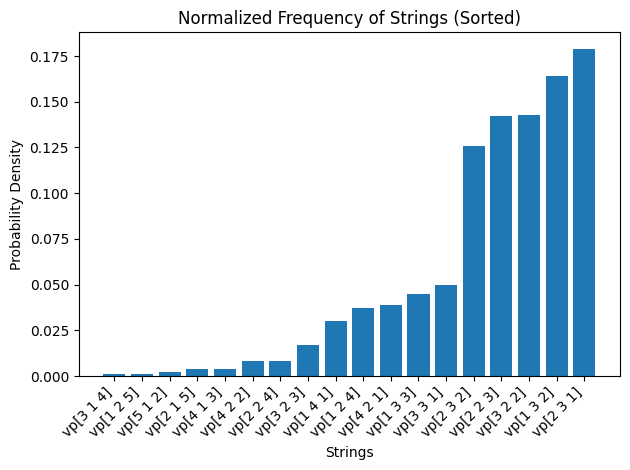

In [67]:
import matplotlib.pyplot as plt
from collections import Counter

# Count the frequency of each string
string_counts = Counter(data)

# Get the strings and their corresponding counts
strings = list(string_counts.keys())
counts = list(string_counts.values())

# Sort strings and counts together based on counts
strings, counts = zip(*sorted(zip(strings, counts), key=lambda x: x[1], reverse=False))

# Calculate total count
total_count = sum(counts)

# Normalize counts to probability density
normalized_counts = [count / total_count for count in counts]

# Create a bar plot with normalized counts
plt.bar(strings, normalized_counts)

# Add labels and title
plt.xlabel('Strings')
plt.ylabel('Probability Density')
plt.title('Normalized Frequency of Strings (Sorted)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



In [625]:
number_of_ways_n_itmes_can_be_put_in_k1_slots_and_k2_double_slots(10,2,1)

36

In [606]:
number_of_ways_n_itmes_can_be_put_in_k1_slots_and_k2_double_slots(8,1,0)

5

In [34]:
def calc_volume(vp):
    return vp[0]+vp[-1]+2*sum(vp[1:-1])

def is_symmetric(vp):
    return vp == vp[::-1]

In [63]:
def random_vp_take_2(V,T):
    vp = [1 for _ in range(T)]
    possibilities = list(range(T))

    while calc_volume(vp)<V-1:
        weights = []
        for i in possibilities:
            if i == 0:
                weight = sp.comb(vp[0]+vp[1]+1,vp[1],exact=True)/sp.comb(vp[0]+vp[1],vp[1],exact=True)
            elif i == T-1:
                weight = sp.comb(vp[-1]+vp[-2]+1,vp[-2],exact=True)/sp.comb(vp[-1]+vp[-2],vp[-2],exact=True)
            else:
                weight = sp.comb(vp[i]+vp[i+1]+1,vp[i+1],exact=True)/sp.comb(vp[i]+vp[i+1],vp[i+1],exact=True)
                weight*=sp.comb(vp[i]+vp[i-1]+1,vp[i-1],exact=True)/sp.comb(vp[i]+vp[i-1],vp[i-1],exact=True)
            weights.append(weight)

        
        weight = np.array(weight)
    
        
        index = np.random.choice(possibilities,p=weights/np.sum(weights))
        vp[index]+=1

    if calc_volume(vp)<V-1:
        possibilities = [0,-1]
        weights = []
        for i in possibilities:
            if i == 0:
                weight = sp.comb(vp[0]+vp[1]+1,vp[1],exact=True)/sp.comb(vp[0]+vp[1],vp[1],exact=True)
            elif i == T-1:
                weight = sp.comb(vp[-1]+vp[-2]+1,vp[-2],exact=True)/sp.comb(vp[-1]+vp[-2],vp[-2],exact=True)
            else:
                weight = sp.comb(vp[i]+vp[i+1]+1,vp[i+1],exact=True)/sp.comb(vp[i]+vp[i+1],vp[i+1],exact=True)
                weight*=sp.comb(vp[i]+vp[i-1]+1,vp[i-1],exact=True)/sp.comb(vp[i]+vp[i-1],vp[i-1],exact=True)
            if is_symmetric(vp):
                weight=10e-10
            weights.append(weight)

        
        weight = np.array(weight)
    
        
        index = np.random.choice(possibilities,p=weights/np.sum(weights))
        vp[index]+=1
        

    return VolumeProfile(vp)

    

In [66]:
data = [str(random_vp_take_2(10,3)) for _ in range(1000)]